In [6]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import seaborn as sns

In [13]:
path = '../names/data'

['review-project-2.ipynb', 'data-wrangling.ipynb', '.ipynb_checkpoints', 'project-2-sample-solution.ipynb', 'project-2-data-wrangling.ipynb', 'review-project-2-solution.ipynb']


# Task 1

In [12]:
df = pd.read_csv(os.path.join(path, 'yob2000.txt'), names=['Name', 'Gender', 'Count'])
df['Percentage'] = 100/df['Count'].sum()*df['Count']
df.head()

,Name,Gender,Count,Percentage
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542


# Task 2

In [28]:
files = [f for f in listdir(path) if isfile(join(path, f))]
li = []
for file in files:
    df = pd.read_csv(f'../names/data/{file}', names=['Name', 'Gender', 'Count'])
    df['Year'] = int(file[3:7])
    df.set_index('Year', inplace = True)
    li.append(df)
frame = pd.concat(li)
frame.head()

,Name,Gender,Count
Year,,,
1936,Mary,F,54373
1936,Shirley,F,35162
1936,Barbara,F,31683
1936,Betty,F,25869
1936,Patricia,F,23916


# Task 3

<AxesSubplot:xlabel='Year'>

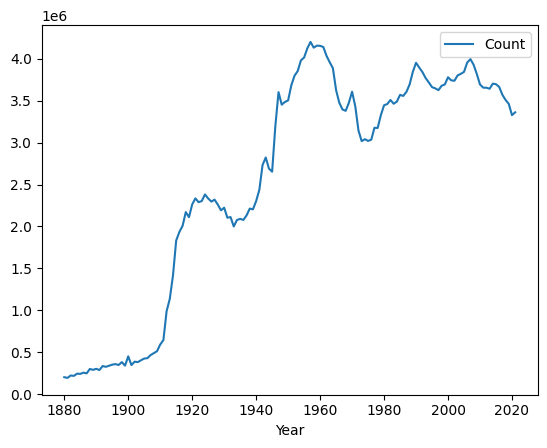

In [55]:
total_births = frame.groupby('Year').sum(['Count'])
total_births.plot()

# Task 4

<AxesSubplot:xlabel='Year'>

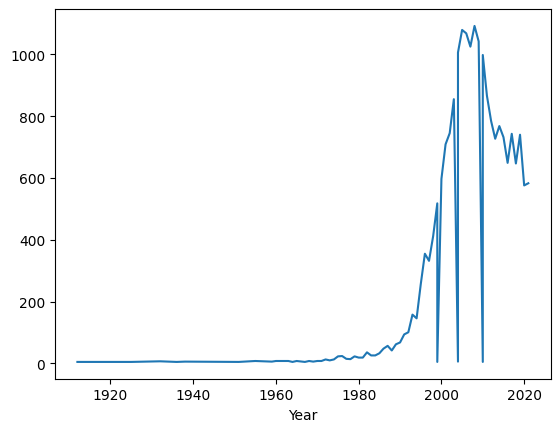

In [34]:
emely = frame.loc[frame['Name'] == 'Emely']
emely['Count'].plot.line()

# Task 5

In [50]:
luke = frame.loc[frame['Name'] == 'Luke']
leia = frame.loc[frame['Name'] == 'Leia']
khaleesi = frame.loc[frame['Name'] == 'Khaleesi']
barack = frame.loc[frame['Name'] == 'Barack']
frida = frame.loc[frame['Name'] == 'Frida']

<AxesSubplot:xlabel='Year'>

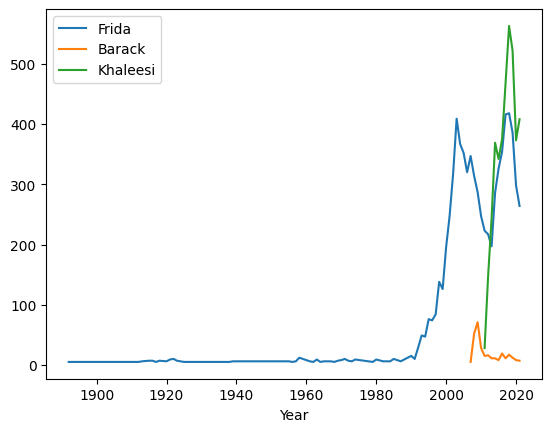

In [51]:
celebs = pd.concat([frida, barack, khaleesi], axis=1)
celebs = celebs.drop(['Gender', 'Name'], axis=1)
celebs.columns.values[0] = 'Frida'
celebs.columns.values[1] = 'Barack'
celebs.columns.values[2] = 'Khaleesi'
celebs.plot()

# Task 6

<AxesSubplot:xlabel='Year'>

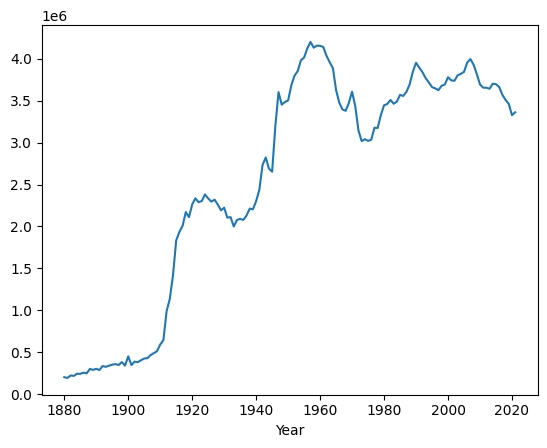

In [60]:
normalization = pd.concat([luke,total_births], axis=1)
normalization.columns.values[3] = 'Total'
normalization['Relative'] =  normalization['Count']/ normalization['Total']
normalization['Total'].plot.line()



How does the result change and why is this important?

In [ ]:
The plot changes relative to the total amount of births in a year, 
meaning the plot fokuses more on how popular a name is and takes less into acount
how high the birth rate in that particular year wa